In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Import the 2014 data for data munging

# Source: 
import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

enc = find_encoding("datasets/mrt_daily_ridership/2014.csv")
print("Encoding: {}".format(enc))

df_2014 = pd.read_csv("datasets/mrt_daily_ridership/2014.csv", encoding=enc)
df_2014.head()

Encoding: ascii


,month,day,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,cubao_entry,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,January,1,03:00 - 03:59,0.0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,January,1,04:00 - 04:59,74.0,0.0,24,0.0,20,0,38,...,3,0,0,0,0,0,0,0,0.0,0.0
2,January,1,05:00 - 05:59,525.0,88.0,191,47.0,121,20,403,...,128,104,51,114,124,333,84,121,417.0,307.0
3,January,1,06:00 - 06:59,663.0,601.0,344,310.0,187,123,619,...,376,285,185,179,489,604,334,198,935.0,822.0
4,January,1,07:00 - 07:59,831.0,965.0,358,436.0,231,178,746,...,458,418,239,200,467,847,458,274,1240.0,1477.0


# Cleaning the Data

In [46]:
## Cleaning the data

# Check the dtypes of each column

df_2014.iloc[:, 3:].dtypes

north_avenue_entry     float64
north_avenue_exit      float64
quezon_avenue_entry      int64
quezon_avenue_exit     float64
gma_kamuning_entry      object
gma_kamuning_exit       object
cubao_entry              int64
cubao_exit               int64
santolan_entry           int64
santolan_exit          float64
ortigas_entry            int64
ortigas_exit             int64
shaw_blvd_entry          int64
shaw_blvd_exit           int64
boni_avenue_entry        int64
boni_avenue_exit         int64
guadalupe_entry          int64
guadalupe_exit           int64
buendia_entry            int64
buendia_exit             int64
ayala_avenue_entry       int64
ayala_avenue_exit        int64
magallanes_entry         int64
magallanes_exit          int64
taft_entry             float64
taft_exit              float64
dtype: object

In [47]:
# Coerce objects to numeric
df_2014.iloc[:, 3:] = df_2014.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors="coerce"))

# Replace nulls with zero
df_2014.fillna(0, inplace=True)

# Typecast all to int
df_2014.iloc[:, 3:] = df_2014.iloc[:, 3:].applymap(int)

df_2014.iloc[:, 3:].dtypes

north_avenue_entry     int64
north_avenue_exit      int64
quezon_avenue_entry    int64
quezon_avenue_exit     int64
gma_kamuning_entry     int64
gma_kamuning_exit      int64
cubao_entry            int64
cubao_exit             int64
santolan_entry         int64
santolan_exit          int64
ortigas_entry          int64
ortigas_exit           int64
shaw_blvd_entry        int64
shaw_blvd_exit         int64
boni_avenue_entry      int64
boni_avenue_exit       int64
guadalupe_entry        int64
guadalupe_exit         int64
buendia_entry          int64
buendia_exit           int64
ayala_avenue_entry     int64
ayala_avenue_exit      int64
magallanes_entry       int64
magallanes_exit        int64
taft_entry             int64
taft_exit              int64
dtype: object

In [48]:
# Convert the month and day columns into a date

df_2014["date"] = pd.to_datetime(df_2014["month"] + df_2014["day"].map(str) + " 2014")

cols = df_2014.columns
cols = cols[2:-1].insert(0, cols[-1])

df_2014 = df_2014[cols]
df_2014.head()

,date,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,cubao_entry,cubao_exit,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,2014-01-01,03:00 - 03:59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-01,04:00 - 04:59,74,0,24,0,20,0,38,0,...,3,0,0,0,0,0,0,0,0,0
2,2014-01-01,05:00 - 05:59,525,88,191,47,121,20,403,68,...,128,104,51,114,124,333,84,121,417,307
3,2014-01-01,06:00 - 06:59,663,601,344,310,187,123,619,396,...,376,285,185,179,489,604,334,198,935,822
4,2014-01-01,07:00 - 07:59,831,965,358,436,231,178,746,582,...,458,418,239,200,467,847,458,274,1240,1477


### Sanity Check

In [49]:
# Sanity check: check the time values
df_2014['time'].unique()

array(['03:00 - 03:59', '04:00 - 04:59', '05:00 - 05:59', '06:00 - 06:59',
       '07:00 - 07:59', '08:00 - 08:59', '09:00 - 09:59', '10:00 - 10:59',
       '11:00 - 11:59', '12:00 - 12:59', '13:00 - 13:59', '14:00 - 14:59',
       '15:00 - 15:59', '16:00 - 16:59', '17:00 - 17:59', '18:00 - 18:59',
       '19:00 - 19:59', '20:00 - 20:59', '21:00 - 21:59', '22:00 - 22:59',
       '23:00 - 23:59', '00:00 - 00:59', '01:00 - 01:59', '02:00 - 02:59'],
      dtype=object)

In [50]:
# Check the entries for 1 day
df_2014[df_2014['date'] == '2014-01-01']['date'].count()

24

In [52]:
# Save the existing dataset to a csv

df_2014.to_pickle("cleaned_datasets/mrt_daily_ridership/2014.pkl")

# Load cleaned data

In [54]:
df_2014 = pd.read_pickle("cleaned_datasets/mrt_daily_ridership/2014.pkl")
df_2014 = df_2014.reset_index()
df_2014 = df_2014.drop(columns=['index'])
df_2014.head()

,date,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,cubao_entry,cubao_exit,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,2014-01-01,03:00 - 03:59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-01,04:00 - 04:59,74,0,24,0,20,0,38,0,...,3,0,0,0,0,0,0,0,0,0
2,2014-01-01,05:00 - 05:59,525,88,191,47,121,20,403,68,...,128,104,51,114,124,333,84,121,417,307
3,2014-01-01,06:00 - 06:59,663,601,344,310,187,123,619,396,...,376,285,185,179,489,604,334,198,935,822
4,2014-01-01,07:00 - 07:59,831,965,358,436,231,178,746,582,...,458,418,239,200,467,847,458,274,1240,1477


# Daily System-wide Ridership

In [55]:
# Get only the entries columns
cols = df_2014.columns
cols = [x for x in cols if "_exit" not in x]
df_2014_entry = df_2014[cols]

In [56]:
# Add across stations
df_2014_entry["total_entry"] = df_2014_entry.iloc[:, 2:].sum(axis=1)
df_2014_entry = df_2014_entry[['date', 'time', 'total_entry']]
df_2014_entry.head()

C:\Users\FrancisZac\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,time,total_entry
0,2014-01-01,03:00 - 03:59,0
1,2014-01-01,04:00 - 04:59,159
2,2014-01-01,05:00 - 05:59,2402
3,2014-01-01,06:00 - 06:59,4986
4,2014-01-01,07:00 - 07:59,6177


In [57]:
# Add across timeslots in a day
df_2014_entry = df_2014_entry.groupby('date').agg({'total_entry': np.sum}).reset_index()
df_2014_entry.head()

,date,total_entry
0,2014-01-01,195090
1,2014-01-02,460301
2,2014-01-03,515462
3,2014-01-04,388761
4,2014-01-05,275518


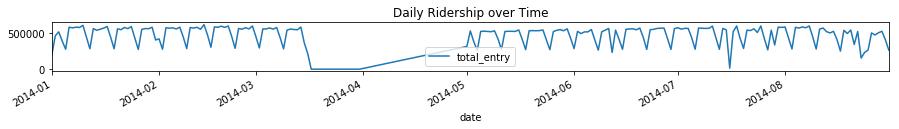

In [58]:
#plt.plot(df_2014_entry['date'], df_2014_entry['total_entry'])
#plt.xlabel('Date')
#plt.ylabel('Passengers Serviced')
#plt.show(aspect='auto')

df_2014_entry.plot('date', 'total_entry', title='Daily Ridership over Time', figsize=(15,1))

In [59]:
# Note the weird pattern between mid-March and June
# This shows a lack of datapoints during this period

df_2014_entry[(df_2014_entry['date'] > '2014-03-10') & (df_2014_entry['date'] < '2014-05-05')]

,date,total_entry
69,2014-03-11,554368
70,2014-03-12,548048
71,2014-03-13,544333
72,2014-03-14,581906
73,2014-03-15,361244
74,2014-03-16,212776
75,2014-03-17,0
76,2014-03-18,0
77,2014-03-19,0
78,2014-03-20,0


In [60]:
# To get accurate averages and monthly data, remove March and April datapoints

df_2014_nomarch = df_2014[(df_2014['date'] < '2014-03-17') | (df_2014['date'] > '2014-04-30')]

df_2014_entry_nomarch = df_2014_entry[(df_2014_entry['date'] < '2014-03-17') | (df_2014_entry['date'] > '2014-04-30')]
df_2014_entry_nomarch[(df_2014_entry_nomarch['date'] > '2014-03-10') & (df_2014_entry_nomarch['date'] < '2014-05-05')]

,date,total_entry
69,2014-03-11,554368
70,2014-03-12,548048
71,2014-03-13,544333
72,2014-03-14,581906
73,2014-03-15,361244
74,2014-03-16,212776
90,2014-05-01,313440
91,2014-05-02,527378
92,2014-05-03,379612
93,2014-05-04,256571


# Daily Ridership Heatmaps

In [61]:
df_2014_netservice = df_2014_nomarch.groupby('time').mean().reset_index()
df_2014_netservice.head()

,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,cubao_entry,cubao_exit,santolan_entry,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,00:00 - 00:59,0.005051,0.000000,0.000000,0.000000,0.000000,0.000000,0.005051,0.005051,0.000000,...,0.005051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,01:00 - 01:59,0.000000,0.000000,0.005051,0.005051,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020202,0.010101,0.000000,0.000000,0.000000,0.000000
2,02:00 - 02:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005051,0.005051,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015152,0.030303,0.000000,0.000000,0.000000,0.000000
3,03:00 - 03:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005051,0.005051,0.005051,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005051,0.005051
4,04:00 - 04:59,512.156566,0.035354,251.530303,4.772727,144.090909,2.873737,339.030303,12.358586,12.212121,...,29.040404,17.621212,5.853535,13.747475,13.530303,26.202020,20.813131,19.419192,65.535354,18.454545


In [62]:
# Get the net passenger service (entry - exit)

df_2014_netservice = df_2014_nomarch.groupby('time').mean().reset_index()

for entry in df_2014_netservice.columns[1::2]:
    exit = entry.replace('entry', 'exit')
    df_2014_netservice[entry] = df_2014_netservice[entry] - df_2014_netservice[exit]
    
cols = [x for x in df_2014_netservice.columns if 'exit' not in x]
df_2014_netservice = df_2014_netservice[cols]

cols = [x.replace('_entry', '') for x in cols]
df_2014_netservice.columns = cols
df_2014_netservice.head()


,time,north_avenue,quezon_avenue,gma_kamuning,cubao,santolan,ortigas,shaw_blvd,boni_avenue,guadalupe,buendia,ayala_avenue,magallanes,taft
0,00:00 - 00:59,0.005051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005051,0.005051,0.000000,0.000000,0.000000,0.000000
1,01:00 - 01:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000
2,02:00 - 02:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015152,0.000000,0.000000
3,03:00 - 03:59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,04:00 - 04:59,512.121212,246.757576,141.217172,326.671717,11.287879,3.747475,61.727273,9.474747,11.419192,-7.893939,-12.671717,1.393939,47.080808


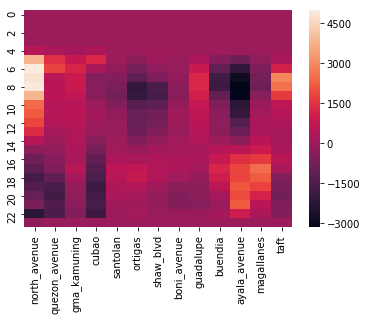

In [64]:
ax = sns.heatmap(df_2014_netservice.iloc[:, 1:])
plt.show()

In [91]:
df_2014_nomarch['weekday'] = df_2014_nomarch['date'].apply(lambda x: (x.weekday() + 1) % 7)
df_2014_byweekday = df_2014_nomarch.groupby(['weekday', 'time']).mean().reset_index()

for entry in df_2014_byweekday.columns[2::2]:
    exit = entry.replace('entry', 'exit')
    df_2014_byweekday[entry] = df_2014_byweekday[entry] - df_2014_byweekday[exit]
    
cols = [x for x in df_2014_byweekday.columns if 'exit' not in x]
df_2014_byweekday = df_2014_byweekday[cols]

cols = [x.replace('_entry', '') for x in cols]
df_2014_byweekday.columns = cols
df_2014_byweekday.head()

C:\Users\FrancisZac\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,weekday,time,north_avenue,quezon_avenue,gma_kamuning,cubao,santolan,ortigas,shaw_blvd,boni_avenue,guadalupe,buendia,ayala_avenue,magallanes,taft
0,0,00:00 - 00:59,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0,01:00 - 01:59,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0,02:00 - 02:59,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0,03:00 - 03:59,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0,04:00 - 04:59,248.37931,115.517241,49.965517,149.137931,6.0,4.068966,35.517241,8.482759,7.724138,1.344828,1.827586,0.37931,16.103448


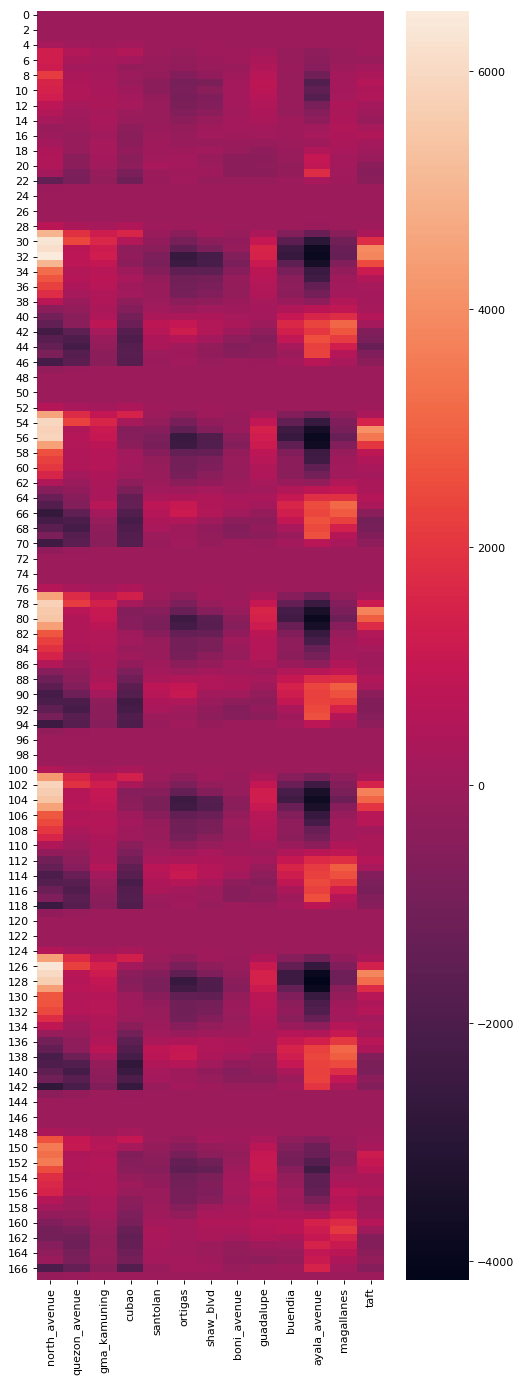

In [92]:
# Show the progression of the heatmap from Sunday to Saturday

from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 21), dpi=80, facecolor='w', edgecolor='k')

sns.heatmap(df_2014_byweekday.iloc[:, 2:])
plt.show()